In [1]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import pdb
import re
from NeosLab import NeosLab as NL

In [2]:
######## Working Directory########
dirname = '/Users/krishnabalasubramanian/Downloads/test'
normalize = True
x_label='Wavelength (nm)'
y_label='Time (s)'
cmap = 'viridis' ### 'jet' or 'seismic','rainbow','viridis'
log = False
filename = 'pristine.png'
plt.rcParams.update({'font.size': 22, 'font.family':'Serif'})

In [3]:
inData = []
for file in glob.glob('*.txt',root_dir = dirname):
    inData.append(np.loadtxt(dirname + '/' + file))
xData =inData[0][:,0]
yData = np.arange(0,len(inData),1)
zData = np.zeros((len(inData),len(xData)))
for i in range(len(inData)):
    if normalize:
         zData[i] = inData[i][:,1]/max(inData[i][:,1])
    else:
        zData[i] = inData[i][:,1]
    if log:
        zData[i] = np.log(zData[i])

In [4]:
glob.glob('*.txt',root_dir = dirname)

['1.1_16mint_b.txt',
 '1.1_28mint_b.txt',
 '1.1_4mint_b.txt',
 '1.1_8mint_b.txt',
 '1.1_24mint_b.txt',
 '1.1_0mint_b.txt',
 '1.1_12mint_b.txt',
 '1.1_20mint_b.txt',
 '1.1_32mint_b.txt']

Text(0, 0.5, 'Time (s)')

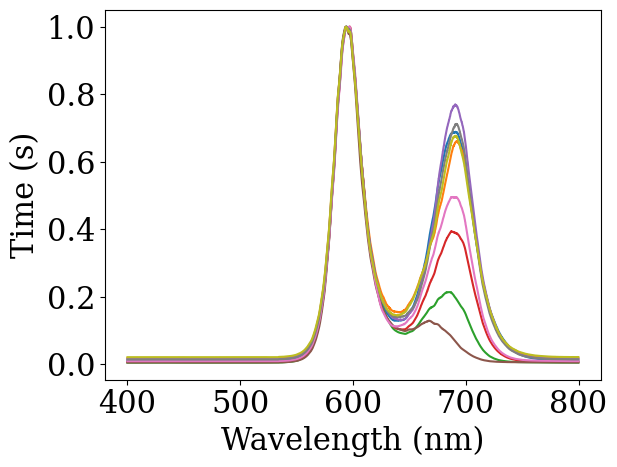

In [5]:
fig0,ax0 = plt.subplots()
for i in range(len(inData)):
    ax0.plot(xData,zData[i,:])
ax0.set_xlabel(x_label)
ax0.set_ylabel(y_label)

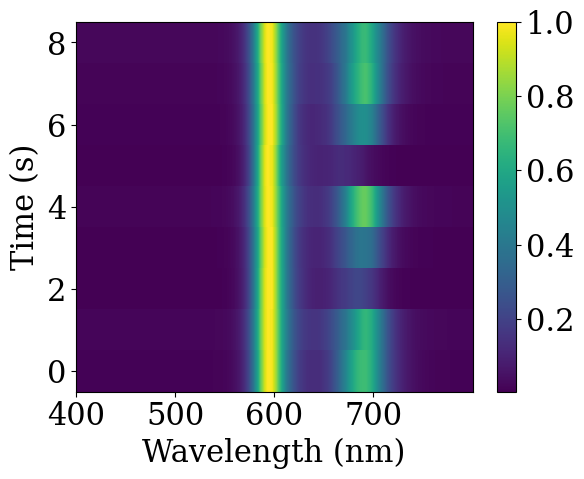

In [6]:
fig,ax = plt.subplots()
#c=ax.pcolor(zData)
c=ax.pcolormesh(xData,yData,zData,shading='nearest',cmap = cmap)
ax.set_xlabel(x_label)
ax.set_ylabel(y_label)
fig.colorbar(c,ax=ax)
fig.savefig(dirname + '/' + filename)

In [7]:
plt.show()

<H2> Mapped data ploting </H2>

In [14]:
fileName = '/Users/krishnabalasubramanian/Downloads/Gb_LA.mat'
skipRows = 18
scanWidth = 55E-6
scanHeight = 60E-6
xSteps = 35
ySteps = 35
################ Fit types can be '1Gauss','1Lor','2Gauss','2Lor'
fitType = '2Gauss'
############### Give the x values for the start and end of fit. Do not give index. Give the value of the 'X' that needs fitting
xStart = 360
xStop = 440
p1 = {"amp":5,"cen": 380,"sigma":5}
p2 = {"amp":5,"cen": 400,"sigma":5}

In [9]:
xAxis,inData = NL.readWitecMappedData(fileName,skipRows,xSteps=xSteps,ySteps=ySteps)

In [16]:
xVal=np.zeros((xSteps,ySteps))
yVal=np.zeros((xSteps,ySteps))
zVal=np.zeros((xSteps,ySteps)) 

for i in range(xSteps):             
        for j in range(ySteps):    
                ################## Get the X and Y positions ######
                xVal[i,j] = i*scanWidth/xSteps   
                yVal[i,j] = j*scanHeight/ySteps           
                ######## Get the starting positions for the fit #####. Fitting the entire span does not do any justice 
                xStartIx=np.searchsorted(xAxis,xStart)
                xStopIx=np.searchsorted(xAxis,xStop)
                popt,pconv = NL.customFit(xAxis[xStartIx:xStopIx],inData[i,j,xStartIx:xStopIx],fitType,[p1,p2])
                ############### plot only the first peak position
                zVal[i,j] = popt[0] 
                ############### plot peak seperation
                #zVal[i,j] = popt[4] - popt[1]


Optimal parameters not found: Number of calls to function has reached maxfev = 1400.
Fitting errors
Optimal parameters not found: Number of calls to function has reached maxfev = 1400.
Fitting errors
Optimal parameters not found: Number of calls to function has reached maxfev = 1400.
Fitting errors
Optimal parameters not found: Number of calls to function has reached maxfev = 1400.
Fitting errors
Optimal parameters not found: Number of calls to function has reached maxfev = 1400.
Fitting errors
Optimal parameters not found: Number of calls to function has reached maxfev = 1400.
Fitting errors
Optimal parameters not found: Number of calls to function has reached maxfev = 1400.
Fitting errors
Optimal parameters not found: Number of calls to function has reached maxfev = 1400.
Fitting errors
Optimal parameters not found: Number of calls to function has reached maxfev = 1400.
Fitting errors
Optimal parameters not found: Number of calls to function has reached maxfev = 1400.
Fitting errors


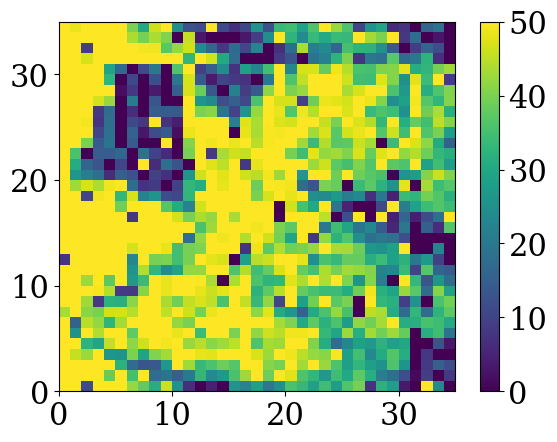

In [17]:
fig,ax = plt.subplots()             
pc=ax.pcolormesh(zVal,vmin = 0,vmax = 50)   
fig.colorbar(pc)                                    
plt.show() 